In [ ]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [32]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
from sqlalchemy import inspect,func
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [21]:
# # Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# # Starting from the most recent data point in the database. 

# # Calculate the date one year from the last date in data set.


# # Perform a query to retrieve the data and precipitation scores



# # Save the query results as a Pandas DataFrame and set the index to the date column

# # Sort the dataframe by date

# # Use Pandas Plotting with Matplotlib to plot the data

import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine, func, desc
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
import datetime as dt

# Connect to the database and reflect the tables
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement

# Create a session and query the last date in the database
session = Session(engine)
latest_date = session.query(Measurement.date).order_by(desc(Measurement.date)).first()[0]

# Calculate the date 12 months prior to the latest date
year_ago_date = (dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')

# Query the last 12 months of precipitation data and save it to a Pandas DataFrame
results = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date >= year_ago_date).\
                    order_by(Measurement.date).all()
df = pd.DataFrame(results, columns=['date', 'prcp'])
df.set_index('date', inplace=True)



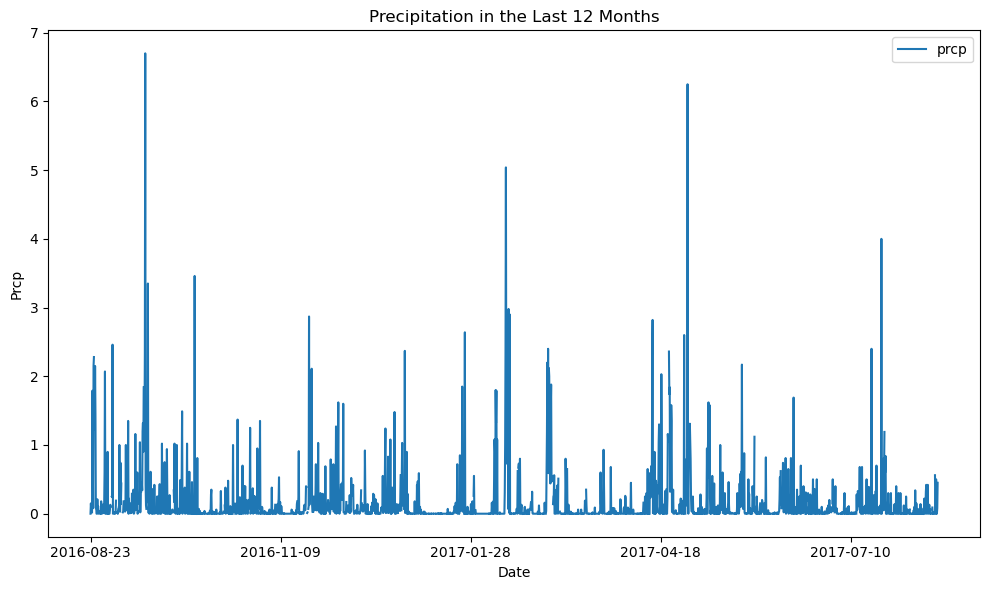

              prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data

# Plot the results using Matplotlib
fig, ax = plt.subplots(figsize=(10,6))
df.plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Prcp')
ax.set_title('Precipitation in the Last 12 Months')
plt.tight_layout()
plt.show()

# Calculate the summary statistics for the precipitation data using Pandas
summary_stats = df.describe()
print(summary_stats)


# Exploratory Station Analysis

In [27]:
#Finding columns and datatype
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])




# Design a query to calculate the total number stations in the dataset
station_count=session.query(func.count(Station.id)).all()
station_count


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


[(9,)]

In [28]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_Measurment_join=session.query(Measurement.station,func.count(Measurement.station)).\
                       group_by(Measurement.station).\
                       order_by(func.count(Measurement.station).desc()).all()
station_Measurment_join


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
results_temp=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
             filter(Measurement.station==station_Measurment_join[0][0]).all()
results_temp

[(54.0, 85.0, 71.66378066378067)]

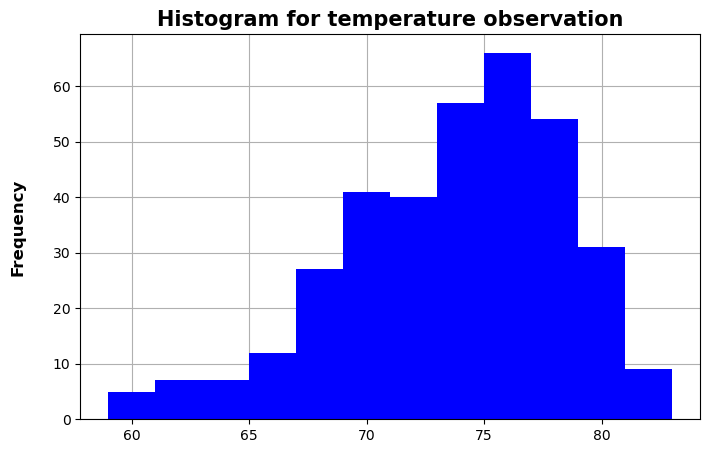

In [35]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

import numpy as np
# Query the latest date for the most active station
results_date = session.query(Measurement.date).order_by(Measurement.date.desc()).filter(Measurement.station == station_Measurment_join[0][0]).first()
str_date = list(np.ravel(results_date))[0]
latest_date = dt.datetime.strptime(str_date, "%Y-%m-%d")

# Calculate the date 1 year ago from the latest date
year_back = latest_date - dt.timedelta(days=365)

# Query the temperature data for the most active station for the last 12 months
results_temp = session.query(Measurement.tobs).filter(Measurement.station == station_Measurment_join[0][0]).filter(Measurement.date >= year_back).all()

# Create a DataFrame with the temperature data
df_results = pd.DataFrame(results_temp)

# Plot a histogram of the temperature data
hist = df_results['tobs'].hist(bins=12, figsize=(8, 5), color='b', zorder=2)

# Set the title of the plot
hist.set_title("Histogram for temperature observation", weight='bold', size=15)

# Set the y-axis label of the plot
hist.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

# Display the plot
plt.show()


# Close session

In [36]:
# Close Session
session.close()